In [1]:
# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Read in Dataframes

In [4]:
grossdf = pd.read_csv('../../zippedData/bom.movie_gross.csv.gz')
#grossdf.head(5)

In [5]:
ratingdf = pd.read_csv('../../zippedData/rt.movie_info.tsv.gz', sep='\t')
#ratingdf.head(5)

In [6]:
reviewdf = pd.read_csv('../../zippedData/rt.reviews.tsv.gz', sep='\t', encoding='iso-8859-1')
#reviewdf.head(5)

In [7]:
tmdbmoviesdf = pd.read_csv('../../zippedData/tmdb.movies.csv.gz')
#tmdbmoviesdf.head(5)

In [8]:
budgetdf = pd.read_csv('../../zippedData/tn.movie_budgets.csv.gz')
#budgetdf.head(5)

In [9]:
import sqlite3
conn = sqlite3.connect('../../zippedData/im.db')
df = pd.read_sql_query("SELECT * FROM movie_basics", conn)

In [10]:
grossdf.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
grossdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [14]:
df.rename(columns={'original_title':'title'}, inplace=True)

In [15]:
merged2 = pd.merge(df, grossdf, on='title')
merged2.drop_duplicates(subset='title', inplace=True)

In [16]:
groupeddf = merged2.groupby('genres')['domestic_gross'].mean()
groupeddf

genres
Action                        1.500078e+07
Action,Adventure              3.827500e+04
Action,Adventure,Animation    1.274276e+08
Action,Adventure,Biography    1.043000e+08
Action,Adventure,Comedy       1.415924e+08
                                  ...     
Romance,Sci-Fi,Thriller       6.250000e+07
Romance,Thriller              2.736500e+05
Sci-Fi                        2.530000e+04
Thriller                      1.216272e+07
Thriller,Western              2.110000e+04
Name: domestic_gross, Length: 280, dtype: float64

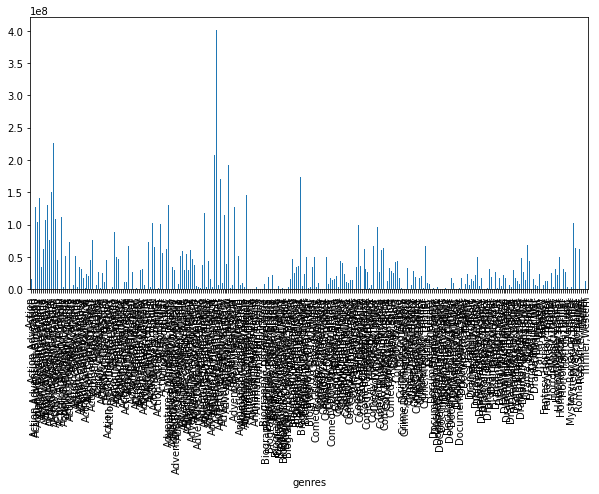

In [17]:
plt.figure(figsize=(10,5))
groupeddf.plot(kind='bar')
plt.show()

In [18]:
merged2.head()

,movie_id,primary_title,title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",IFC,744000.0,8000000,2012
7,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",Fox,58200000.0,129900000,2013
8,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",Uni.,26300000.0,26900000,2014
9,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Uni.,652300000.0,"1,019.4",2015


In [19]:
grouped = merged2.groupby('genres')['domestic_gross'].mean()

In [20]:
top_10 = grouped.nlargest(10)
top_10

genres
Adventure,Drama,Sport         4.007000e+08
Action,Adventure,Sci-Fi       2.258432e+08
Adventure,Drama,Sci-Fi        2.082000e+08
Adventure,Fantasy             1.929000e+08
Biography,Drama,Musical       1.743000e+08
Adventure,Drama,Western       1.712000e+08
Action,Adventure,Mystery      1.509000e+08
Animation,Comedy,Family       1.458669e+08
Action,Adventure,Comedy       1.415924e+08
Adventure,Animation,Comedy    1.306782e+08
Name: domestic_gross, dtype: float64

In [21]:
# Hypothesis testing
from scipy.stats import ttest_ind

In [22]:
merged2.dropna(subset=['domestic_gross'], inplace=True)

In [36]:
# Define the two samples
action_movies = merged2[merged2['genres'] == 'Family']['domestic_gross']
all_movies = merged2['domestic_gross']

# Perform the hypothesis test
t_statistic, p_value = ttest_ind(action_movies, all_movies)

print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -0.7187371936752974
p-value: 0.4723809280383363


In [33]:
len(action_movies)

160

In [34]:
len(all_movies)

2151

In [24]:
merged2['domestic_gross'].isnull().sum()

0